# Step 1: EDA and Feature Engineering

In [1]:
import pandas as pd

C:\Users\subod\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\subod\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\subod\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('ailerons_train.csv')

In [3]:
from dataprep.eda import create_report

In [4]:
report = create_report(df)
report.save('EDA_Report')

  0%|                                                                                         | 0/9084 [00:00<…

Report has been saved to EDA_Report.html!


In [5]:
df.head()

climbRate  Sgz     p     q  curPitch  curRoll  absRoll  diffClb  \
0          2  -56 -0.33 -0.09      0.90      0.2      -11       12   
1        470  -39  0.02  0.12      0.39     -0.6      -12        8   
2        165    4  0.14  0.14      0.78      0.4      -11       -9   
3       -113    5 -0.12  0.11      1.06      0.6      -10       -7   
4       -411  -21 -0.17  0.07      1.33     -0.6      -11        0   

   diffRollRate  diffDiffClb  ...  diffSeTime8  diffSeTime9  diffSeTime10  \
0         0.004         -0.1  ...          0.0          0.0           0.0   
1         0.009         -1.6  ...          0.0          0.0           0.0   
2        -0.003         -0.2  ...          0.0          0.0           0.0   
3        -0.008          0.0  ...          0.0          0.0           0.0   
4         0.002          0.1  ...          0.0          0.0           0.0   

   diffSeTime11  diffSeTime12  diffSeTime13  diffSeTime14  alpha     Se  \
0           0.0           0.0         0.000           0.0    0.9  0.032   
1           0.0           0.0         0.000           0.0    0.9  0.034   
2           0.0           0.0         0.000           0.0    1.0  0.034   
3           0.0           0.0         0.000           0.0    0.9  0.033   
4           0.0           0.0        -0.002           0.0    0.9  0.032   

     goal  
0 -0.0009  
1 -0.0011  
2 -0.0012  
3 -0.0011  
4 -0.0008  

[5 rows x 41 columns]

In [6]:
df.shape

(12250, 41)

In [7]:
df.columns

Index(['climbRate', 'Sgz', 'p', 'q', 'curPitch', 'curRoll', 'absRoll',
       'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4',
       'diffSeTime5', 'diffSeTime6', 'diffSeTime7', 'diffSeTime8',
       'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12',
       'diffSeTime13', 'diffSeTime14', 'alpha', 'Se', 'goal'],
      dtype='object')

In [8]:
len(df.columns)

41

In [9]:
#Since the data has a lot of columns, feature selection will be required.

In [10]:
df.describe()

climbRate           Sgz             p             q      curPitch  \
count  12250.000000  12250.000000  12250.000000  12250.000000  12250.000000   
mean      -9.362939    -12.632408      0.006878      0.061144      0.626213   
std      259.502687     25.727234      0.305488      0.118447      0.312061   
min     -975.000000    -99.000000     -1.530000     -0.540000     -0.420000   
25%     -176.000000    -29.000000     -0.220000     -0.020000      0.420000   
50%      -20.000000    -13.000000      0.020000      0.060000      0.610000   
75%      159.000000      3.000000      0.230000      0.130000      0.800000   
max      977.000000     94.000000      1.060000      0.620000      2.580000   

            curRoll       absRoll       diffClb  diffRollRate   diffDiffClb  \
count  12250.000000  12250.000000  12250.000000  12250.000000  12250.000000   
mean       0.067045    -11.068816     -0.919592     -0.000970     -0.053698   
std        0.969050      4.094653     10.405533      0.013352      1.121631   
min       -3.100000    -23.000000    -43.000000     -0.099000     -8.800000   
25%       -0.600000    -14.000000     -8.000000     -0.009000     -0.300000   
50%        0.200000    -11.000000     -1.000000     -0.001000     -0.100000   
75%        0.700000     -8.000000      6.000000      0.008000      0.200000   
max        2.900000     -3.000000     46.000000      0.056000     11.200000   

       ...   diffSeTime8   diffSeTime9  diffSeTime10  diffSeTime11  \
count  ...  12250.000000  12250.000000  1.225000e+04  12250.000000   
mean   ...      0.000000     -0.000103 -5.714286e-07     -0.000100   
std    ...      0.000013      0.000621  8.806480e-05      0.000644   
min    ...     -0.001000     -0.006000 -6.000000e-03     -0.006000   
25%    ...      0.000000      0.000000  0.000000e+00      0.000000   
50%    ...      0.000000      0.000000  0.000000e+00      0.000000   
75%    ...      0.000000      0.000000  0.000000e+00      0.000000   
max    ...      0.001000      0.003000  6.000000e-03      0.005000   

       diffSeTime12  diffSeTime13  diffSeTime14         alpha            Se  \
count  1.225000e+04  12250.000000  1.225000e+04  12250.000000  12250.000000   
mean  -6.530612e-07     -0.000096 -3.265306e-07      0.622106      0.021949   
std    5.569441e-05      0.000617  3.129801e-05      0.195486      0.006912   
min   -4.000000e-03     -0.006000 -3.000000e-03      0.400000      0.012000   
25%    0.000000e+00      0.000000  0.000000e+00      0.500000      0.018000   
50%    0.000000e+00      0.000000  0.000000e+00      0.600000      0.020000   
75%    0.000000e+00      0.000000  0.000000e+00      0.700000      0.023000   
max    2.000000e-03      0.007000  1.000000e-03      2.000000      0.073000   

               goal  
count  12250.000000  
mean      -0.000871  
std        0.000404  
min       -0.003600  
25%       -0.001100  
50%       -0.000800  
75%       -0.000600  
max       -0.000200  

[8 rows x 41 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12250 non-null  int64  
 1   Sgz           12250 non-null  int64  
 2   p             12250 non-null  float64
 3   q             12250 non-null  float64
 4   curPitch      12250 non-null  float64
 5   curRoll       12250 non-null  float64
 6   absRoll       12250 non-null  int64  
 7   diffClb       12250 non-null  int64  
 8   diffRollRate  12250 non-null  float64
 9   diffDiffClb   12250 non-null  float64
 10  SeTime1       12250 non-null  float64
 11  SeTime2       12250 non-null  float64
 12  SeTime3       12250 non-null  float64
 13  SeTime4       12250 non-null  float64
 14  SeTime5       12250 non-null  float64
 15  SeTime6       12250 non-null  float64
 16  SeTime7       12250 non-null  float64
 17  SeTime8       12250 non-null  float64
 18  SeTime9       12250 non-nu

In [12]:
#So all of them are numerical values.We won't need to do any encoding.

In [13]:
df.isnull().sum().sum()

0

In [14]:
#There are no missing values.

In [15]:
# df.corr()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

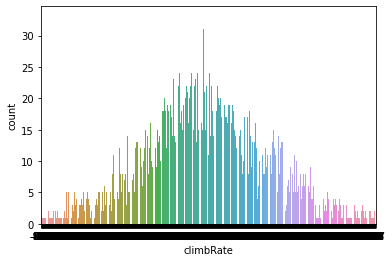

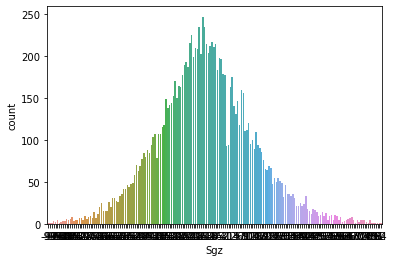

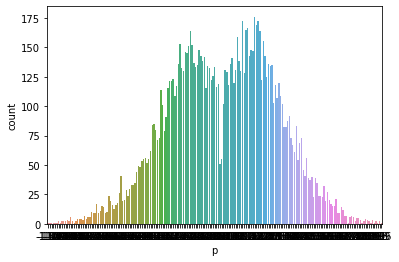

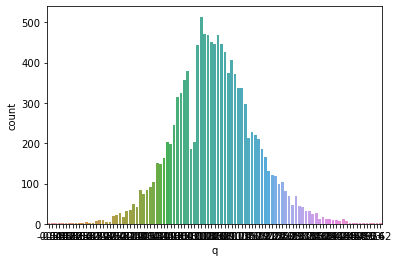

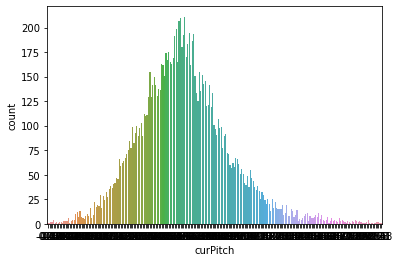

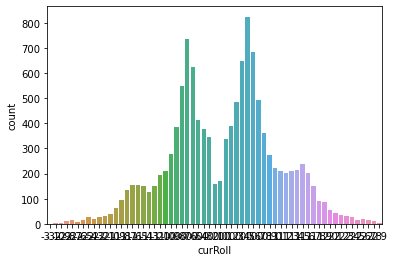

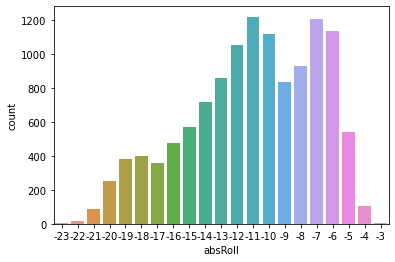

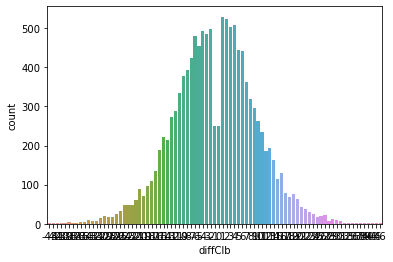

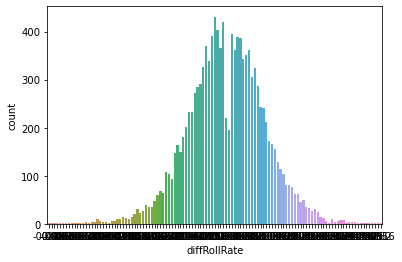

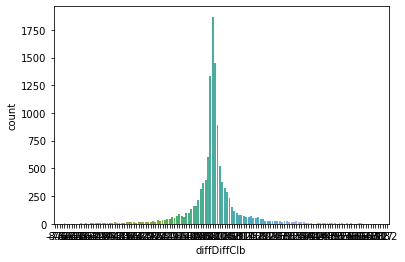

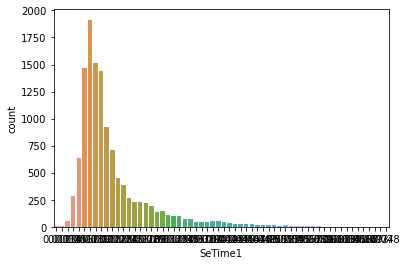

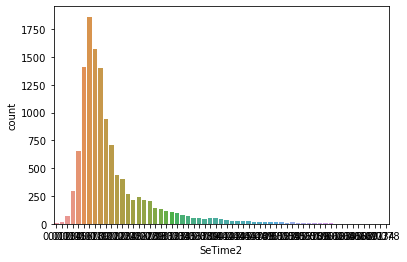

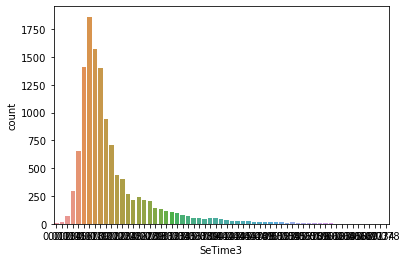

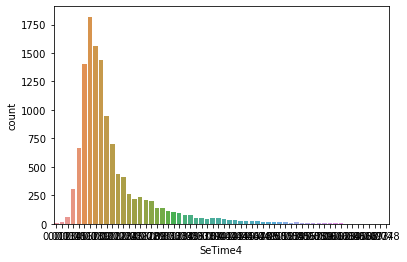

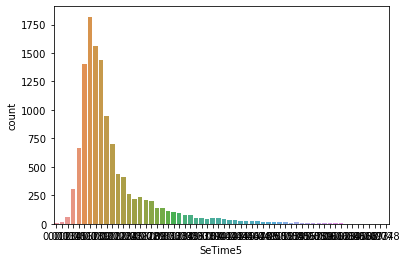

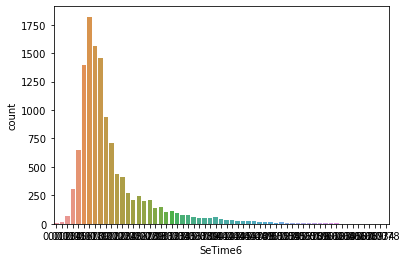

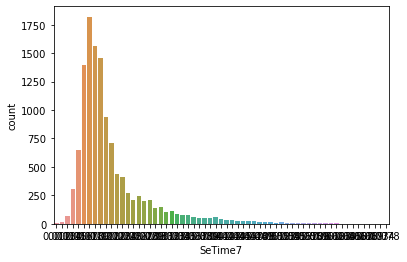

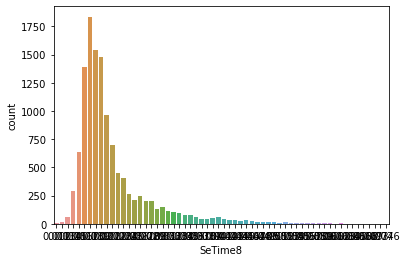

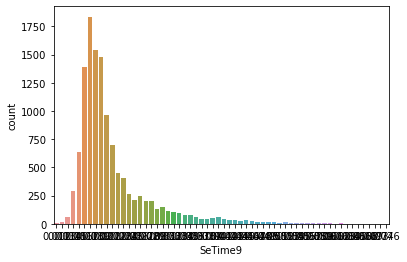

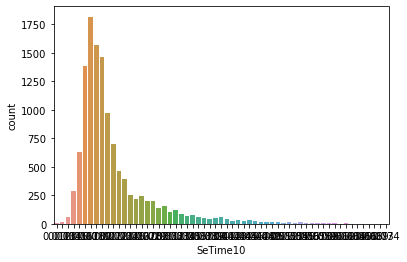

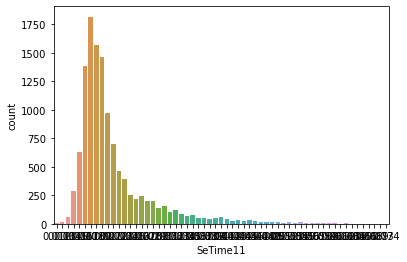

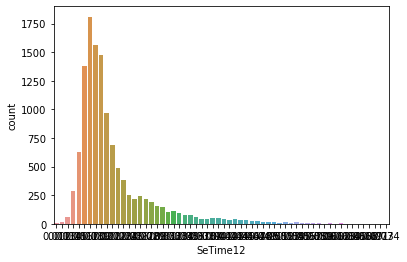

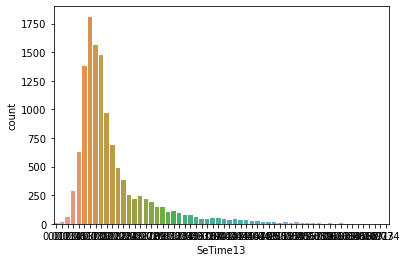

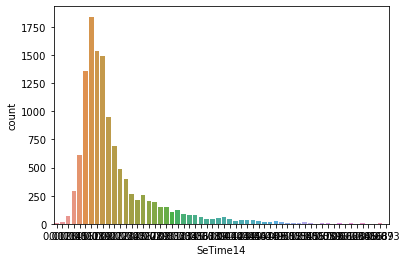

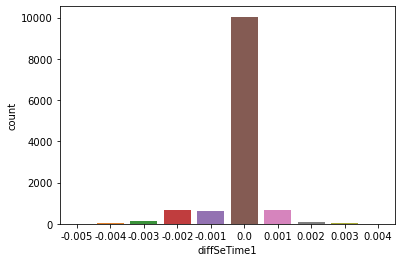

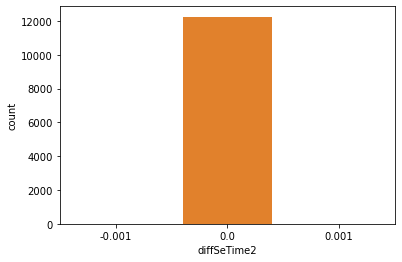

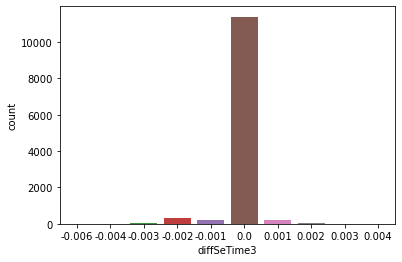

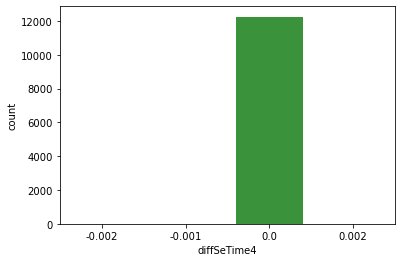

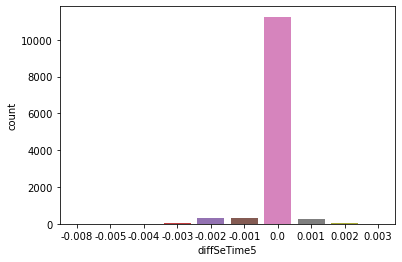

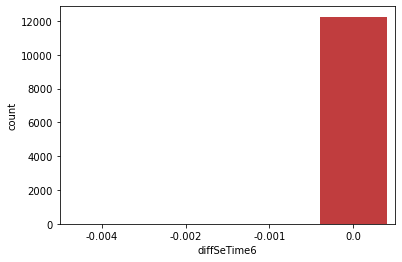

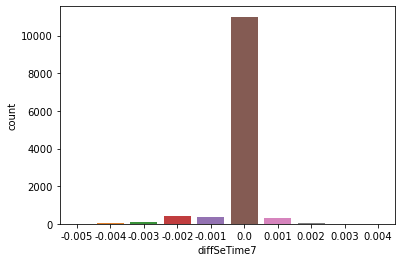

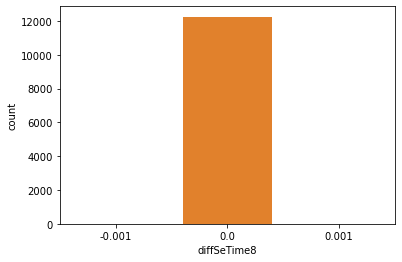

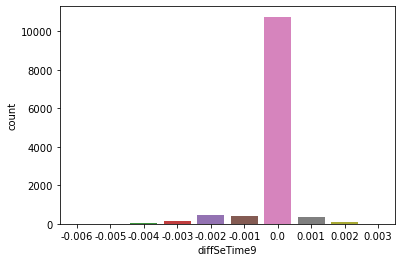

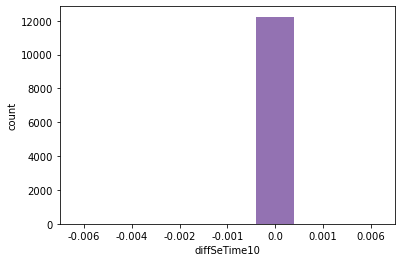

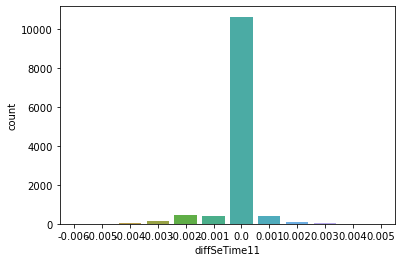

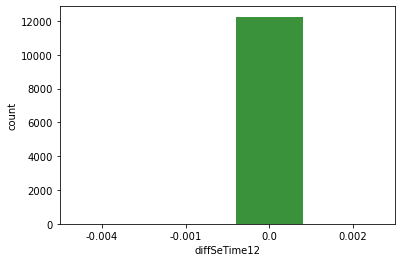

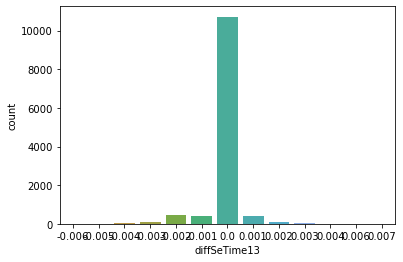

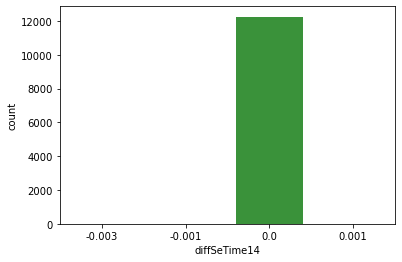

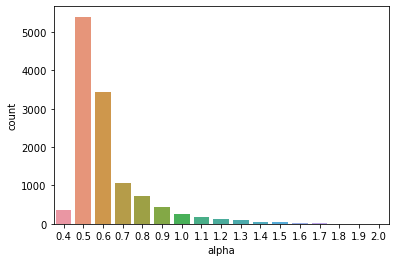

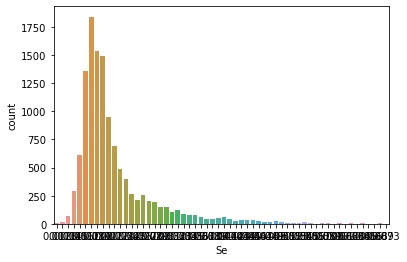

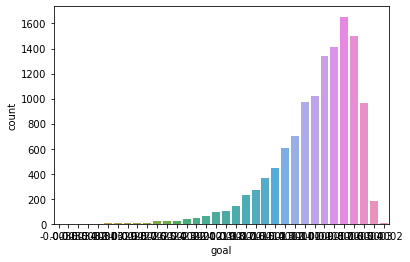

In [17]:
for column in df.columns:
    sns.countplot(x = column, data = df)
    plt.show()

In [18]:
# We can see that a lot of the features do not have a Normal Distribution.
# We will have to perform Log-Normalization to convert the data into Gaussian Normal Distribution.

In [19]:
import numpy as np

In [20]:
df['diffSeTime2'].value_counts()

 0.000    12248
-0.001        1
 0.001        1
Name: diffSeTime2, dtype: int64

In [21]:
df.corr()

climbRate       Sgz         p         q  curPitch   curRoll  \
climbRate      1.000000 -0.004769  0.162379  0.093983 -0.790573 -0.122171   
Sgz           -0.004769  1.000000  0.060038  0.339946 -0.002966 -0.000332   
p              0.162379  0.060038  1.000000  0.112880 -0.122564 -0.034589   
q              0.093983  0.339946  0.112880  1.000000  0.142712  0.035692   
curPitch      -0.790573 -0.002966 -0.122564  0.142712  1.000000  0.079088   
curRoll       -0.122171 -0.000332 -0.034589  0.035692  0.079088  1.000000   
absRoll       -0.037557  0.087779 -0.020300 -0.386417 -0.160461  0.208059   
diffClb        0.074529 -0.447481 -0.080816 -0.774364 -0.189940 -0.157744   
diffRollRate   0.159539 -0.051378  0.140791 -0.194475 -0.142244 -0.670810   
diffDiffClb   -0.330871 -0.015052 -0.123676 -0.436004  0.234823  0.028178   
SeTime1        0.094530 -0.003635  0.029970  0.346914  0.519697 -0.045408   
SeTime2        0.080349  0.002278  0.033051  0.362780  0.532706 -0.041174   
SeTime3        0.080376  0.002269  0.033066  0.362783  0.532677 -0.041179   
SeTime4        0.073132  0.005068  0.033664  0.369841  0.539249 -0.038618   
SeTime5        0.073157  0.005074  0.033690  0.369943  0.539224 -0.038608   
SeTime6        0.064980  0.006640  0.031011  0.376286  0.546932 -0.036429   
SeTime7        0.064934  0.006624  0.030899  0.376355  0.546976 -0.036389   
SeTime8        0.052460  0.006360  0.025836  0.384132  0.558616 -0.033627   
SeTime9        0.052458  0.006393  0.025864  0.384147  0.558620 -0.033635   
SeTime10       0.036596  0.006609  0.021172  0.394224  0.573154 -0.030203   
SeTime11       0.036386  0.006694  0.021109  0.394398  0.573395 -0.030029   
SeTime12       0.017863  0.006913  0.016016  0.403464  0.590264 -0.027976   
SeTime13       0.017749  0.006937  0.015966  0.403627  0.590389 -0.027969   
SeTime14      -0.000394  0.007019  0.009815  0.408569  0.606253 -0.025514   
diffSeTime1    0.196165 -0.082206 -0.001668 -0.204338 -0.187568 -0.060046   
diffSeTime2   -0.006598  0.002483  0.012967 -0.006473  0.004095 -0.005274   
diffSeTime3    0.153262 -0.054631  0.006870 -0.139101 -0.136680 -0.052665   
diffSeTime4    0.001699 -0.005471  0.016403 -0.025998 -0.002175 -0.009335   
diffSeTime5    0.160262 -0.020507  0.071729 -0.126703 -0.161417 -0.043333   
diffSeTime6    0.008739  0.007679  0.033497 -0.025477 -0.028287 -0.010811   
diffSeTime7    0.214631  0.011638  0.105809 -0.136951 -0.205179 -0.046928   
diffSeTime8    0.006426 -0.014155 -0.008157 -0.015643 -0.003685  0.001319   
diffSeTime9    0.242695  0.010022  0.092941 -0.159573 -0.233430 -0.046755   
diffSeTime10   0.022704 -0.007799  0.015410 -0.023730 -0.036321 -0.018493   
diffSeTime11   0.274342  0.008539  0.096137 -0.142138 -0.260085 -0.025538   
diffSeTime12   0.014947 -0.005416  0.019553 -0.034909 -0.029125 -0.002668   
diffSeTime13   0.272714  0.018485  0.111082 -0.078019 -0.245107 -0.030619   
diffSeTime14   0.005222 -0.000763  0.015690 -0.019279 -0.027878 -0.003854   
alpha         -0.011497 -0.012498  0.001767  0.348660  0.610813 -0.023865   
Se            -0.000421  0.007036  0.009811  0.408586  0.606279 -0.025510   
goal          -0.077366  0.078725 -0.322841 -0.383138 -0.306602 -0.097322   

                   absRoll   diffClb  diffRollRate  diffDiffClb  ...  \
climbRate    -3.755702e-02  0.074529      0.159539    -0.330871  ...   
Sgz           8.777852e-02 -0.447481     -0.051378    -0.015052  ...   
p            -2.029987e-02 -0.080816      0.140791    -0.123676  ...   
q            -3.864172e-01 -0.774364     -0.194475    -0.436004  ...   
curPitch     -1.604610e-01 -0.189940     -0.142244     0.234823  ...   
curRoll       2.080591e-01 -0.157744     -0.670810     0.028178  ...   
absRoll       1.000000e+00 -0.038985     -0.178391     0.003691  ...   
diffClb      -3.898536e-02  1.000000      0.329807     0.043486  ...   
diffRollRate -1.783912e-01  0.329807      1.000000    -0.003601  ...   
diffDiffClb   3.690861e-03  0.043486     -0.003601     1.00

In [22]:
#We can see that almost all of the records in the features with "diffSeTime" are 0, 
# and have lower correlation  with "goal", so we can drop these features.

In [23]:
#It would be better if we convert these features into normal distributions.

In [24]:
from scipy import stats
import pylab
#Making a function to simplify the process:
def plot_distribution(data):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data,plot=pylab)
    plt.show()

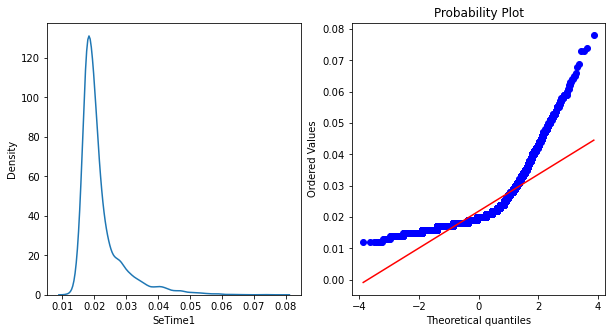

In [25]:
plot_distribution(df['SeTime1'])

### Types of transformations that can be performed:
 - Logarithmic Transformation
 - Reciprocal Transformation
 - Square Root Transformation
 - Exponential Transformation
 - Box-Cox Transformation 

#### Logarithmic Transformation:

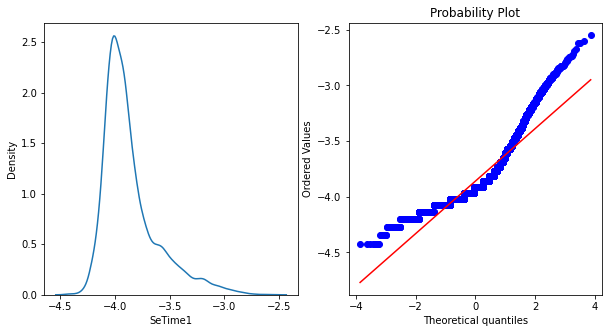

In [26]:
plot_distribution(np.log(df['SeTime1']))

#### Reciprocal Transformation:

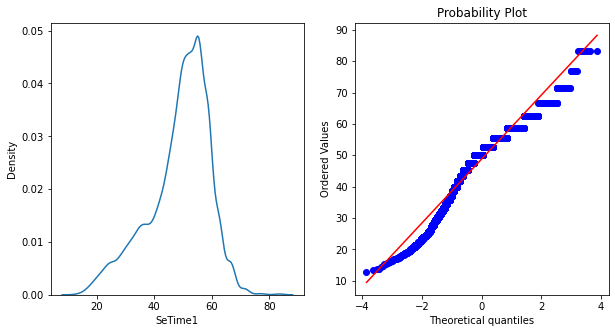

In [27]:
plot_distribution(df['SeTime1']**(-1))

#### Square Root Transformation:

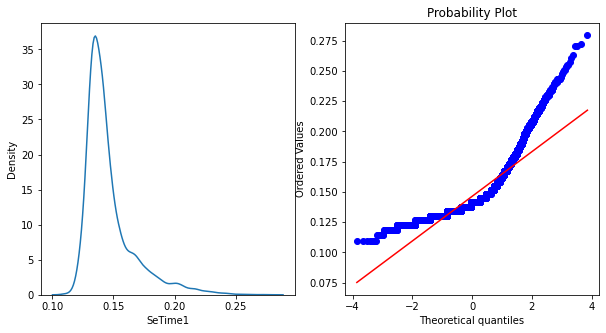

In [28]:
plot_distribution(np.sqrt(df['SeTime1']))

#### Exponential Transformation:

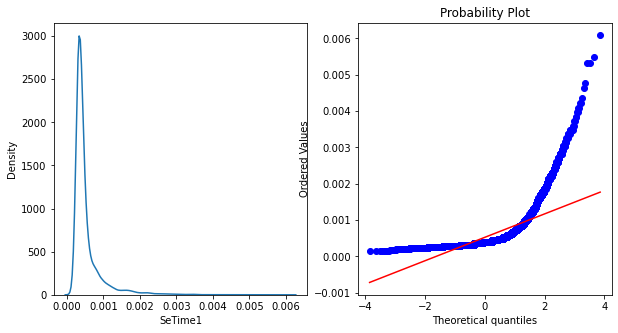

In [29]:
plot_distribution(df['SeTime1']**2)

#### Box-Cox Transformation:

In [30]:
transformed,params = stats.boxcox(df['SeTime1'])

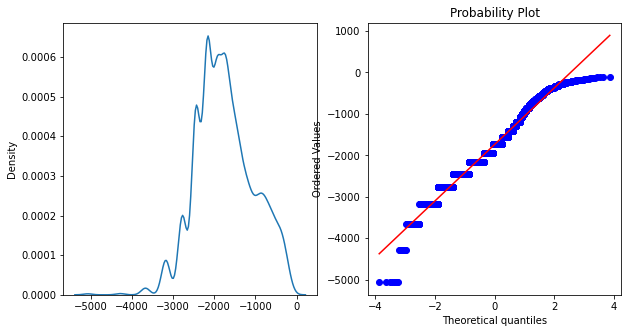

In [31]:
plot_distribution(transformed)

In [32]:
#Neither of these distributions are performing well on data.
#We can use sklearn.feature_selection to get the best features directly.

## Feature Selection:

In [33]:
#Our main aim for using feature selection is to reduce the computational cost by removing less important features.
#We know that all the data in df is numerical, and the output is also numerical, in the regression model.
#There is no categorical feature or feature with Object data type.
#We can use Pearson's correlation to find out which features are important.

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [35]:
df

climbRate  Sgz     p     q  curPitch  curRoll  absRoll  diffClb  \
0              2  -56 -0.33 -0.09      0.90      0.2      -11       12   
1            470  -39  0.02  0.12      0.39     -0.6      -12        8   
2            165    4  0.14  0.14      0.78      0.4      -11       -9   
3           -113    5 -0.12  0.11      1.06      0.6      -10       -7   
4           -411  -21 -0.17  0.07      1.33     -0.6      -11        0   
...          ...  ...   ...   ...       ...      ...      ...      ...   
12245        448   39  0.21  0.05      0.14     -0.5       -8       -4   
12246        179   64  0.06  0.17      0.41      0.5       -8       -9   
12247         65   66 -0.03  0.14      0.54      0.5       -7      -17   
12248        -22   66 -0.08  0.23      0.61      0.5       -8      -15   
12249        -59   47 -0.04  0.07      0.61     -0.7       -9       -7   

       diffRollRate  diffDiffClb  ...  diffSeTime8  diffSeTime9  diffSeTime10  \
0             0.004         -0.1  ...          0.0        0.000           0.0   
1             0.009         -1.6  ...          0.0        0.000           0.0   
2            -0.003         -0.2  ...          0.0        0.000           0.0   
3            -0.008          0.0  ...          0.0        0.000           0.0   
4             0.002          0.1  ...          0.0        0.000           0.0   
...             ...          ...  ...          ...          ...           ...   
12245         0.009         -0.1  ...          0.0        0.000           0.0   
12246        -0.010         -0.6  ...          0.0        0.000           0.0   
12247        -0.010          0.4  ...          0.0        0.001           0.0   
12248        -0.010         -0.6  ...          0.0        0.000           0.0   
12249         0.004          0.2  ...          0.0        0.000           0.0   

       diffSeTime11  diffSeTime12  diffSeTime13  diffSeTime14  alpha     Se  \
0               0.0           0.0         0.000           0.0    0.9  0.032   
1               0.0           0.0         0.000           0.0    0.9  0.034   
2               0.0           0.0         0.000           0.0    1.0  0.034   
3               0.0           0.0         0.000           0.0    0.9  0.033   
4               0.0           0.0        -0.002           0.0    0.9  0.032   
...             ...           ...           ...           ...    ...    ...   
12245           0.0           0.0         0.000           0.0    0.5  0.019   
12246           0.0           0.0         0.000           0.0    0.6  0.021   
12247           0.0           0.0         0.000           0.0    0.6  0.021   
12248           0.0           0.0         0.000           0.0    0.6  0.022   
12249           0.0           0.0         0.000           0.0    0.6  0.020   

         goal  
0     -0.0009  
1     -0.0011  
2     -0.0012  
3     -0.0011  
4     -0.0008  
...       ...  
12245 -0.0007  
12246 -0.0008  
12247 -0.0007  
12248 -0.0006  
12249 -0.0004  

[12250 rows x 41 columns]

In [36]:
fs = SelectKBest(score_func=f_regression, k=20)
X = df.drop('goal',axis=1)
y = df['goal']
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
X_selected

(12250, 20)


array([[-0.33 , -0.09 ,  0.9  , ...,  0.032,  0.9  ,  0.032],
       [ 0.02 ,  0.12 ,  0.39 , ...,  0.034,  0.9  ,  0.034],
       [ 0.14 ,  0.14 ,  0.78 , ...,  0.034,  1.   ,  0.034],
       ...,
       [-0.03 ,  0.14 ,  0.54 , ...,  0.021,  0.6  ,  0.021],
       [-0.08 ,  0.23 ,  0.61 , ...,  0.022,  0.6  ,  0.022],
       [-0.04 ,  0.07 ,  0.61 , ...,  0.02 ,  0.6  ,  0.02 ]])

In [37]:
columns = X.columns
selected = fs.get_support()
selected_cols = []

In [38]:
for i in range(0,len(columns)):
    if selected[i]:
        selected_cols.append(columns[i])

In [39]:
selected_cols

['p',
 'q',
 'curPitch',
 'absRoll',
 'SeTime1',
 'SeTime2',
 'SeTime3',
 'SeTime4',
 'SeTime5',
 'SeTime6',
 'SeTime7',
 'SeTime8',
 'SeTime9',
 'SeTime10',
 'SeTime11',
 'SeTime12',
 'SeTime13',
 'SeTime14',
 'alpha',
 'Se']

In [40]:
# X = X_selected

In [41]:
X = X[selected_cols]

In [42]:
X

p     q  curPitch  absRoll  SeTime1  SeTime2  SeTime3  SeTime4  \
0     -0.33 -0.09      0.90      -11    0.032    0.032    0.032    0.032   
1      0.02  0.12      0.39      -12    0.034    0.034    0.034    0.034   
2      0.14  0.14      0.78      -11    0.034    0.034    0.034    0.034   
3     -0.12  0.11      1.06      -10    0.033    0.033    0.033    0.033   
4     -0.17  0.07      1.33      -11    0.030    0.030    0.030    0.030   
...     ...   ...       ...      ...      ...      ...      ...      ...   
12245  0.21  0.05      0.14       -8    0.019    0.019    0.019    0.019   
12246  0.06  0.17      0.41       -8    0.022    0.021    0.021    0.021   
12247 -0.03  0.14      0.54       -7    0.022    0.022    0.022    0.022   
12248 -0.08  0.23      0.61       -8    0.020    0.021    0.021    0.022   
12249 -0.04  0.07      0.61       -9    0.020    0.020    0.020    0.020   

       SeTime5  SeTime6  SeTime7  SeTime8  SeTime9  SeTime10  SeTime11  \
0        0.032    0.032    0.032    0.032    0.032     0.032     0.032   
1        0.034    0.034    0.034    0.034    0.034     0.034     0.034   
2        0.034    0.034    0.034    0.034    0.034     0.034     0.034   
3        0.033    0.033    0.033    0.033    0.033     0.033     0.033   
4        0.030    0.030    0.030    0.030    0.030     0.030     0.030   
...        ...      ...      ...      ...      ...       ...       ...   
12245    0.019    0.019    0.019    0.019    0.019     0.019     0.019   
12246    0.021    0.021    0.021    0.021    0.021     0.021     0.021   
12247    0.022    0.022    0.022    0.022    0.022     0.021     0.021   
12248    0.022    0.022    0.022    0.022    0.022     0.022     0.022   
12249    0.020    0.020    0.020    0.020    0.020     0.020     0.020   

       SeTime12  SeTime13  SeTime14  alpha     Se  
0         0.032     0.032     0.032    0.9  0.032  
1         0.034     0.034     0.034    0.9  0.034  
2         0.034     0.034     0.034    1.0  0.034  
3         0.033     0.033     0.033    0.9  0.033  
4         0.030     0.030     0.032    0.9  0.032  
...         ...       ...       ...    ...    ...  
12245     0.019     0.019     0.019    0.5  0.019  
12246     0.021     0.021     0.021    0.6  0.021  
12247     0.021     0.021     0.021    0.6  0.021  
12248     0.022     0.022     0.022    0.6  0.022  
12249     0.020     0.020     0.020    0.6  0.020  

[12250 rows x 20 columns]

# Step 2: Building the Base Model:

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
model_results = pd.DataFrame({'Name':[],'R2_Score':[],'RMSE':[]})

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [46]:
model = LinearRegression().fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("Score:",model.score(X_test,y_test))

RMSE: 0.00020077973543240846
Score: 0.7643530176336418


In [47]:
model_results = model_results.append({'Name':'Linear Regression','R2_Score':model.score(X_test,y_test),
                      'RMSE':np.sqrt(mean_squared_error(y_pred,y_test))},ignore_index=True)

In [48]:
model_results

Name  R2_Score      RMSE
0  Linear Regression  0.764353  0.000201

# Step 3: Testing other models

### Decision Tree:

In [49]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("Score:",model.score(X_test,y_test))

model_results = model_results.append({'Name':'Decision Tree','R2_Score':model.score(X_test,y_test),
                      'RMSE':np.sqrt(mean_squared_error(y_pred,y_test))},ignore_index=True)

RMSE: 0.00027365130004004264
Score: 0.5622590674343442


### KNN:

In [50]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor().fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("Score:",model.score(X_test,y_test))

model_results = model_results.append({'Name':'KNN','R2_Score':model.score(X_test,y_test),
                      'RMSE':np.sqrt(mean_squared_error(y_pred,y_test))},ignore_index=True)

RMSE: 0.00021556948782615933
Score: 0.7283581327142827


### SVM:

In [51]:
from sklearn.svm import SVR
model = SVR().fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("Score:",model.score(X_test,y_test))

model_results = model_results.append({'Name':'SVM','R2_Score':model.score(X_test,y_test),
                      'RMSE':np.sqrt(mean_squared_error(y_pred,y_test))},ignore_index=True)

RMSE: 0.0010993071411012497
Score: -6.064155095480537


### Random Forest:

In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("Score:",model.score(X_test,y_test))

model_results = model_results.append({'Name':'Random Forest','R2_Score':model.score(X_test,y_test),
                      'RMSE':np.sqrt(mean_squared_error(y_pred,y_test))},ignore_index=True)

RMSE: 0.0001971318933029824
Score: 0.7728378798343526


### XGBoost:

In [53]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("Score:",model.score(X_test,y_test))

model_results = model_results.append({'Name':'XGBoost','R2_Score':model.score(X_test,y_test),
                      'RMSE':np.sqrt(mean_squared_error(y_pred,y_test))},ignore_index=True)

RMSE: 0.00019573107121802715
Score: 0.7760548438055361


### AdaBoost:

In [54]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor().fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("Score:",model.score(X_test,y_test))

model_results = model_results.append({'Name':'AdaBoost','R2_Score':model.score(X_test,y_test),
                      'RMSE':np.sqrt(mean_squared_error(y_pred,y_test))},ignore_index=True)

RMSE: 0.00023046216159412815
Score: 0.6895287505810173


### Gradient Boosting Regressor:

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("Score:",model.score(X_test,y_test))

model_results = model_results.append({'Name':'GB Regressor','R2_Score':model.score(X_test,y_test),
                      'RMSE':np.sqrt(mean_squared_error(y_pred,y_test))},ignore_index=True)

RMSE: 0.0001896849159103727
Score: 0.7896765387918725


In [56]:
#So far, Random Forest and Gradient Boosting Regressor are the best models.

## Using Deep Learning MLP:

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(20,)),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1)
])
#After experimenting with multiple Neural network Architectures, I found this one to be the most optimal.

In [59]:
model.compile(loss = 'mse',optimizer='adam')

In [60]:
X_train.shape

(8575, 20)

In [61]:
model.fit(X_train,y_train,epochs=50,verbose=2)

Epoch 1/50
268/268 - 1s - loss: 2.9758e-06 - 1s/epoch - 5ms/step
Epoch 2/50
268/268 - 0s - loss: 1.1697e-07 - 346ms/epoch - 1ms/step
Epoch 3/50
268/268 - 0s - loss: 1.0123e-07 - 402ms/epoch - 2ms/step
Epoch 4/50
268/268 - 0s - loss: 1.0747e-07 - 317ms/epoch - 1ms/step
Epoch 5/50
268/268 - 0s - loss: 1.0910e-07 - 309ms/epoch - 1ms/step
Epoch 6/50
268/268 - 0s - loss: 7.6650e-08 - 383ms/epoch - 1ms/step
Epoch 7/50
268/268 - 0s - loss: 9.2432e-08 - 380ms/epoch - 1ms/step
Epoch 8/50
268/268 - 0s - loss: 9.0606e-08 - 436ms/epoch - 2ms/step
Epoch 9/50
268/268 - 0s - loss: 8.2863e-08 - 396ms/epoch - 1ms/step
Epoch 10/50
268/268 - 0s - loss: 9.6222e-08 - 374ms/epoch - 1ms/step
Epoch 11/50
268/268 - 0s - loss: 7.6002e-08 - 328ms/epoch - 1ms/step
Epoch 12/50
268/268 - 1s - loss: 8.5224e-08 - 592ms/epoch - 2ms/step
Epoch 13/50
268/268 - 0s - loss: 8.1681e-08 - 450ms/epoch - 2ms/step
Epoch 14/50
268/268 - 0s - loss: 7.4883e-08 - 352ms/epoch - 1ms/step
Epoch 15/50
268/268 - 0s - loss: 1.3399e-07 - 

In [62]:
model.evaluate(X_train,y_train)

268/268 [==============================] - 0s 828us/step - loss: 9.7518e-08


9.751800433832614e-08

In [63]:
model.evaluate(X_test,y_test)

115/115 [==============================] - 0s 783us/step - loss: 9.5268e-08


9.526819155780686e-08

In [64]:
y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("R2 Score:",r2_score(y_pred,y_test))

model_results = model_results.append({'Name':'Deep Learning Model','R2_Score':r2_score(y_pred,y_test),
                      'RMSE':np.sqrt(mean_squared_error(y_pred,y_test))},ignore_index=True)

RMSE: 0.0003086554515471435
R2 Score: -0.696553851943343


In [65]:
#The most optimal Deep learning model still has slightly worse RMSE value, 
#than the RMSE values of Random Forest and Gradient Boosting Regressor.

## Conclusion from training different models:

In [66]:
model_results

Name  R2_Score      RMSE
0    Linear Regression  0.764353  0.000201
1        Decision Tree  0.562259  0.000274
2                  KNN  0.728358  0.000216
3                  SVM -6.064155  0.001099
4        Random Forest  0.772838  0.000197
5              XGBoost  0.776055  0.000196
6             AdaBoost  0.689529  0.000230
7         GB Regressor  0.789677  0.000190
8  Deep Learning Model -0.696554  0.000309

<AxesSubplot:xlabel='Name', ylabel='RMSE'>

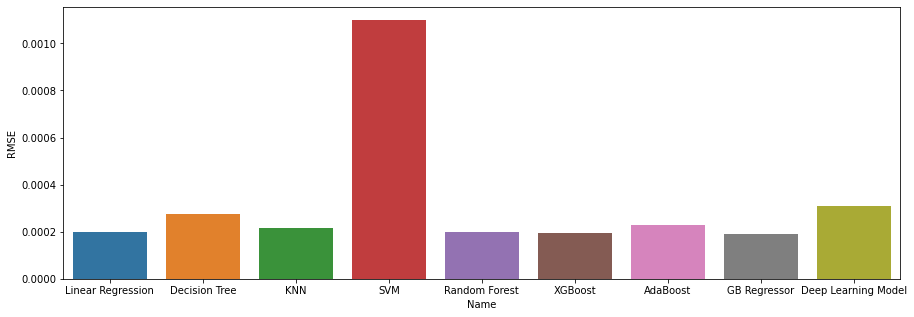

In [67]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Name',y = 'RMSE',data=model_results)

In [68]:
#Since the best models are still the Random Forest Regressor and Gradient Boosting Regressor, we shall continue with them.

# Step 4: Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

## Tuning the Random Forest Model:

In [70]:
#Tuning the number of estimators:
param_grid = {'n_estimators': range(127,132,1)}
rf = RandomForestRegressor()
tuned_model = GridSearchCV(rf,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
r2_score: 0.7739844554282258
RMSE: 0.00019663376326571605
best params: {'n_estimators': 129}
best score: -0.00019979174843766284
best estimator: -0.00019979174843766284


In [71]:
# {'n_estimators': 129}

In [72]:
#Tuning max_features:
param_grid = {'max_features': ['auto', 'sqrt']}
rf = RandomForestRegressor(n_estimators = 129)
tuned_model = GridSearchCV(rf,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
r2_score: 0.774783845397378
RMSE: 0.0001962857201863221
best params: {'max_features': 'auto'}
best score: -0.00020038228140787477
best estimator: -0.00020038228140787477


In [73]:
# {'max_features': 'auto'}

In [74]:
#Tuning max_depth:
param_grid = {'max_depth': range(5,15)}
rf = RandomForestRegressor(n_estimators = 129, max_features='auto')
tuned_model = GridSearchCV(rf,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
r2_score: 0.7857868014591283
RMSE: 0.0001914309035776183
best params: {'max_depth': 8}
best score: -0.0001962842491590153
best estimator: -0.0001962842491590153


In [75]:
# {'max_depth': 8}

In [76]:
#Tuning min_samples_split:
param_grid = {'min_samples_split': [2,5,10]}
rf = RandomForestRegressor(n_estimators = 129, max_features='auto',max_depth=8)
tuned_model = GridSearchCV(rf,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
r2_score: 0.785710927888523
RMSE: 0.00019146480265659497
best params: {'min_samples_split': 10}
best score: -0.00019612528588090032
best estimator: -0.00019612528588090032


In [77]:
# {'min_samples_split': 10}

In [78]:
#Tuning min_samples_leaf:
param_grid = {'min_samples_leaf': [1, 2, 4, 8, 16]}
rf = RandomForestRegressor(n_estimators = 129, max_features='auto',max_depth=8,min_samples_split=10)
tuned_model = GridSearchCV(rf,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
r2_score: 0.7860347256932845
RMSE: 0.00019132009317761661
best params: {'min_samples_leaf': 2}
best score: -0.00019632535951659714
best estimator: -0.00019632535951659714


In [79]:
# {'min_samples_leaf': 2}

In [79]:
#Tuning bootstrap:
param_grid = {'bootstrap': [True, False]}
rf = RandomForestRegressor(n_estimators = 129, max_features='auto',max_depth=8,min_samples_split=10,min_samples_leaf=2)
tuned_model = GridSearchCV(rf,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
r2_score: 0.7857325083633334
RMSE: 0.00019145516146177463
best params: {'bootstrap': True}
best score: -0.00019629933178892732
best estimator: -0.00019629933178892732


In [80]:
# {'bootstrap': True}

### Tuned Random Forest Model:

In [81]:
rf = RandomForestRegressor(n_estimators = 129, max_features='auto',max_depth=8,
                           min_samples_split=10,min_samples_leaf=2,bootstrap=True)

In [82]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=129)

In [83]:
y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.7857325083633334
RMSE: 0.00019145516146177463


## Tuning the Gradient Boosting Model:

In [84]:
#Tuning the number of estimators:
param_grid = {'n_estimators': range(145,155)}
gbm = GradientBoostingRegressor()
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
r2_score: 0.7886287567975006
RMSE: 0.00019015681173102541
best params: {'n_estimators': 153}
best score: -0.00019538438922493833
best estimator: -0.00019538438922493833


In [86]:
# {'n_estimators': 153}

In [85]:
#Tuning max_depth
param_grid = {'max_depth':[2,5,10]}
gbm = GradientBoostingRegressor(n_estimators=153)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
r2_score: 0.7896099205686051
RMSE: 0.00018971495409902703
best params: {'max_depth': 2}
best score: -0.00019512145715340078
best estimator: -0.00019512145715340078


In [86]:
# {'max_depth': 2}

In [87]:
#Tuning min_samples_split
param_grid = {'min_samples_split':range(200,1001,200)}
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=2)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
r2_score: 0.78898301457969
RMSE: 0.00018999739368826435
best params: {'min_samples_split': 200}
best score: -0.00019514505961586672
best estimator: -0.00019514505961586672


In [88]:
# {'min_samples_split': 200}

In [89]:
#Tuning min_samples_leaf
param_grid = {'min_samples_leaf':range(20,100,20)}
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=2,min_samples_split=200)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
r2_score: 0.7890211261181276
RMSE: 0.00018998023530658454
best params: {'min_samples_leaf': 40}
best score: -0.00019481257143517285
best estimator: -0.00019481257143517285


In [90]:
# {'min_samples_leaf': 40}

In [91]:
#Tuning max_features:
param_grid = {'max_features':range(4,20,2)}
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=2,min_samples_split=200,min_samples_leaf=40)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
r2_score: 0.7884569723568231
RMSE: 0.0001902340676214604
best params: {'max_features': 16}
best score: -0.00019494497866362278
best estimator: -0.00019494497866362278


In [92]:
# {'max_features': 16}

In [93]:
#Tuning subsample:
param_grid = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=2,min_samples_split=200,min_samples_leaf=40,max_features=16)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
r2_score: 0.7882476314552835
RMSE: 0.00019032817122825778
best params: {'subsample': 0.6}
best score: -0.00019503262132300957
best estimator: -0.00019503262132300957


In [94]:
# {'subsample': 0.6}

# The Final Tuned Gradient Boosting Regressor Model:

In [95]:
#Final Tuned Model is Gradient Boosting Regressor with RMSE of 0.00019

In [96]:
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=2,min_samples_split=200,
                                min_samples_leaf=40,max_features=16,subsample=0.6)
gbm.fit(X_train,y_train)

y_pred = gbm.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.7881201031434683
RMSE: 0.0001903854753735052


In [97]:
X.columns

Index(['p', 'q', 'curPitch', 'absRoll', 'SeTime1', 'SeTime2', 'SeTime3',
       'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8', 'SeTime9',
       'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14', 'alpha',
       'Se'],
      dtype='object')

## Verifying against all the features together:

In [98]:
X = df.drop('goal',axis=1)
y = df['goal']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [99]:
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=2,min_samples_split=200,
                                min_samples_leaf=40,max_features=16,subsample=0.9)
gbm.fit(X_train,y_train)

y_pred = gbm.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.8452962973685038
RMSE: 0.0001626819203591011


In [105]:
#We can see that the model performs better with all the features included.
#So we can include all the features in our predictions.

## Hyperparameter Tuning GBM on all the features:

In [100]:
#Tuning the number of estimators:
param_grid = {'n_estimators': range(145,155)}
gbm = GradientBoostingRegressor()
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
r2_score: 0.849509219093462
RMSE: 0.00016045153793505648
best params: {'n_estimators': 153}
best score: -0.0001650228216549738
best estimator: -0.0001650228216549738


In [101]:
# {'n_estimators': 153}

In [102]:
#Tuning max_depth
param_grid = {'max_depth':[2,5,10]}
gbm = GradientBoostingRegressor(n_estimators=153)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
r2_score: 0.8529397063743472
RMSE: 0.0001586122225372109
best params: {'max_depth': 5}
best score: -0.00016429600712135047
best estimator: -0.00016429600712135047


In [103]:
# {'max_depth': 5}

In [104]:
#Tuning min_samples_split
param_grid = {'min_samples_split':range(200,1001,200)}
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=5)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
r2_score: 0.8528069703183245
RMSE: 0.000158683787783562
best params: {'min_samples_split': 200}
best score: -0.00016544893129180648
best estimator: -0.00016544893129180648


In [105]:
# {'min_samples_split': 200}

In [106]:
#Tuning min_samples_leaf
param_grid = {'min_samples_leaf':range(20,100,20)}
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=5,min_samples_split=200)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
r2_score: 0.8538340980670539
RMSE: 0.00015812916282596437
best params: {'min_samples_leaf': 20}
best score: -0.0001640417586593722
best estimator: -0.0001640417586593722


In [107]:
# {'min_samples_leaf': 20}

In [108]:
#Tuning max_features:
param_grid = {'max_features':range(4,20,2)}
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=5,min_samples_split=200,min_samples_leaf=20)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
r2_score: 0.853686317643928
RMSE: 0.00015820908054492856
best params: {'max_features': 12}
best score: -0.00016348497225884338
best estimator: -0.00016348497225884338


In [109]:
# {'max_features': 12}

In [110]:
#Tuning subsample:
param_grid = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=5,min_samples_split=200,min_samples_leaf=20,max_features=12)
tuned_model = GridSearchCV(gbm,scoring='neg_root_mean_squared_error', param_grid = param_grid,cv = 3, verbose=2, n_jobs = -1)
tuned_model.fit(X_train,y_train)

y_pred = tuned_model.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

print("best params:",tuned_model.best_params_)
print("best score:",tuned_model.best_score_)
print("best estimator:",tuned_model.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
r2_score: 0.851364777824392
RMSE: 0.0001594592821299392
best params: {'subsample': 0.7}
best score: -0.00016396835155497343
best estimator: -0.00016396835155497343


In [111]:
# {'subsample': 0.7}

# Final Tuned GBM on all the features:

In [137]:
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=5,min_samples_split=200,
                                min_samples_leaf=20,max_features=12,subsample=0.7)
gbm.fit(X_train,y_train)

y_pred = gbm.predict(X_test)
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.853752370493119
RMSE: 0.00015817336501901575


In [138]:
#This is the most optimal model on the given data.

# Conclusion:

In [139]:
#Out of these models, Gradient Boosting Model performed the best.
#Since all the features had some important information, it was better to include all the features.
model_results

Name  R2_Score      RMSE
0    Linear Regression  0.764353  0.000201
1        Decision Tree  0.562259  0.000274
2                  KNN  0.728358  0.000216
3                  SVM -6.064155  0.001099
4        Random Forest  0.772838  0.000197
5              XGBoost  0.776055  0.000196
6             AdaBoost  0.689529  0.000230
7         GB Regressor  0.789677  0.000190
8  Deep Learning Model -0.696554  0.000309

In [140]:
#So Final model:
gbm = GradientBoostingRegressor(n_estimators=153,max_depth=5,min_samples_split=200,
                                min_samples_leaf=20,max_features=12,subsample=0.7)